In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import gc
from ggplot import *

In [77]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [78]:
target = train['target']

In [79]:
def get_features(tmp):
    return [x for x in tmp.columns if x not in ['connection_id','target']]

def free():
    return gc.collect()

def plot_(tmp,an=True):
    plt.figure(figsize=(15,10))
    sns.heatmap(data=tmp.corr(),annot=an)
    plt.show()
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')        

In [80]:
# print_full(test['cont_11'].value_counts())

# Feature Set 1

In [81]:
pca=PCA(n_components=2,svd_solver='full',random_state=1996)
pca.fit(train[get_features(train)])
print(sum(pca.explained_variance_ratio_))
fs1_tr=pca.transform(train[get_features(train)])
fs1_ts=pca.transform(test[get_features(test)])
fs1_tr=pd.DataFrame(fs1_tr,columns=['pca'+str(i) for i in range(2)])
fs1_ts=pd.DataFrame(fs1_ts,columns=['pca'+str(i) for i in range(2)])
print(fs1_tr.shape,fs1_ts.shape)

0.999820606401
(169307, 2) (91166, 2)


In [82]:
# chart = ggplot( train, aes(x='pca0', y='pca1', color='target') ) \
#         + geom_point(size=75,alpha=1) \
#         + ggtitle("First and Second Principal Components colored by target")

Cleaning

In [83]:
#Drop 'cat_4','cat_5','cat_6','cat_7','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18' columns
train=train.drop(['cat_4','cat_5','cat_6','cat_7','cat_8','cat_10','cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','cat_18','cat_19'],1)
test=test.drop(['cat_4','cat_5','cat_6','cat_7','cat_8','cat_10','cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','cat_18','cat_19'],1)

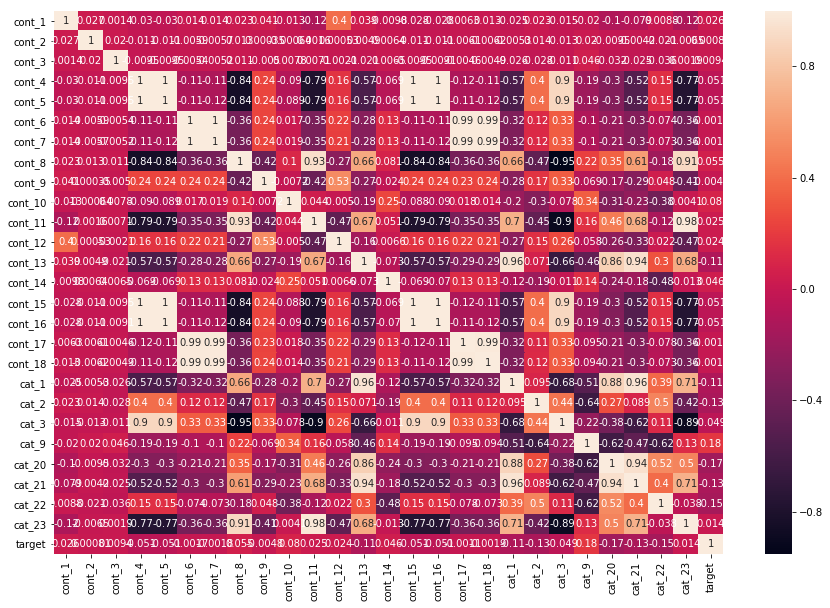

In [73]:
plot_(train)

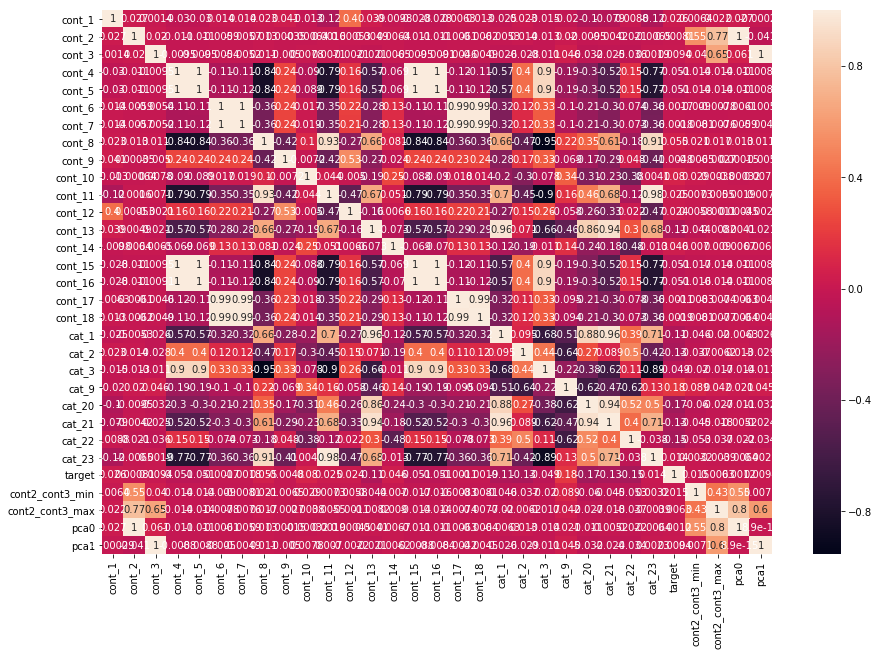

In [15]:
plot_(pd.concat([train,pca_tr_early],1))

# Feature Set 2

In [84]:
#catgs
fs2_tr,fs2_ts=pd.DataFrame(),pd.DataFrame()

cat_features=[i for i in get_features(train) if 'cont' in i]

for i in cat_features:
    fs2_tr[i]=train[i]
    fs2_ts[i]=test[i]
print(fs2_tr.shape,fs2_ts.shape)    

(169307, 18) (91166, 18)


# Feature Set 3

In [85]:
#catgs
fs3_tr,fs3_ts=pd.DataFrame(),pd.DataFrame()

cat_features=[i for i in get_features(train) if 'cat' in i]

for i in cat_features:
    fs3_tr[i]=train[i]
    fs3_ts[i]=test[i]
print(fs3_tr.shape,fs3_ts.shape)    

(169307, 8) (91166, 8)


# Feature Set 4

In [87]:
fs4_tr,fs4_ts=pd.DataFrame(),pd.DataFrame()

fs4_tr['cont2_cont3_min']=[min(i,j) for i,j in zip(train['cont_2'],train['cont_3'])]
fs4_tr['cont2_cont3_max']=[max(i,j) for i,j in zip(train['cont_2'],train['cont_3'])]
fs4_tr['cont2_cont3_mean']=[(i+j)/2 for i,j in zip(train['cont_2'],train['cont_3'])]

fs4_ts['cont2_cont3_min']=[min(i,j) for i,j in zip(test['cont_2'],test['cont_3'])]
fs4_ts['cont2_cont3_max']=[max(i,j) for i,j in zip(test['cont_2'],test['cont_3'])]  #fail
fs4_ts['cont2_cont3_mean']=[(i+j)/2 for i,j in zip(test['cont_2'],test['cont_3'])]  #fail

print(fs4_tr.shape,fs4_ts.shape)

(169307, 3) (91166, 3)


# Feature Set 5

In [89]:
fs5_tr,fs5_ts=pd.DataFrame(),pd.DataFrame()

fs5_tr['cat_3_enc']=['cat1' if i<=1 else('cat2' if i<=7 else 'cat3') for i in train['cat_3'].values]
fs5_ts['cat_3_enc']=['cat1' if i<=1 else('cat2' if i<=7 else 'cat3') for i in test['cat_3'].values]

attack_1=[1,2,3,11,15,40]
attack_0=[10,13]

major_attack_1,major_attack_0=[],[]
for i in train['cat_2'].values:
    if i in attack_1:
        major_attack_1.append(1)
    else :
        major_attack_1.append(0)
    if i in attack_0:
        major_attack_0.append(1)
    else:
        major_attack_0.append(0)
            
fs5_tr['is_attack_1']=major_attack_1
fs5_tr['is_attack_0']=major_attack_0

major_attack_1,major_attack_0,not_attack_1=[],[],[]
for i in test['cat_2'].values:
    if i in attack_1:
        major_attack_1.append(1)
    else :
        major_attack_1.append(0)
    if i in attack_0:
        major_attack_0.append(1)
    else:
        major_attack_0.append(0)
            
fs5_ts['is_attack_1']=major_attack_1
fs5_ts['is_attack_0']=major_attack_0

fs5_tr['cat_2_enc']=['cat1' if i<=9 else ('cat2' if i==10 else 'cat3') for i in train['cat_2'].values]
fs5_ts['cat_2_enc']=['cat1' if i<=9 else ('cat2' if i==10 else 'cat3') for i in test['cat_2'].values]

fs5_tr['cat_20_enc']=['cat1' if i<=50 else('cat2' if i<=500 else 'cat3') for i in train['cat_20'].values]
fs5_ts['cat_20_enc']=['cat1' if i<=50 else('cat2' if i<=500 else 'cat3') for i in test['cat_20'].values]

fs5_tr['cat_21_enc']=['cat1' if i<=20 else('cat2' if i<=500 else 'cat3') for i in train['cat_21'].values]
fs5_ts['cat_21_enc']=['cat1' if i<=20 else('cat2' if i<=500 else 'cat3') for i in test['cat_21'].values]

fs5_tr['cat_22_enc']=['cat1' if i<=254 else 'cat2' for i in train['cat_22'].values]
fs5_ts['cat_22_enc']=['cat1' if i<=254 else 'cat2' for i in test['cat_22'].values]

fs5_tr['cat_23_enc']=['cat1' if i<=25 else('cat2' if i<=254 else 'cat3') for i in train['cat_23'].values]
fs5_ts['cat_23_enc']=['cat1' if i<=25 else('cat2' if i<=254 else 'cat3') for i in test['cat_23'].values]


from sklearn.preprocessing import LabelEncoder
for i in ['cat_2_enc','cat_3_enc','cat_20_enc','cat_21_enc','cat_22_enc','cat_23_enc']:
    encoder=LabelEncoder()
    encoder.fit(fs5_tr[i].values)
    fs5_tr[i]=encoder.transform(fs5_tr[i])
    fs5_ts[i]=encoder.transform(fs5_ts[i])
    print(fs5_tr.shape,fs5_ts.shape,'\n------------------------------------------\n')
    

(169307, 8) (91166, 8) 
------------------------------------------

(169307, 8) (91166, 8) 
------------------------------------------

(169307, 8) (91166, 8) 
------------------------------------------

(169307, 8) (91166, 8) 
------------------------------------------

(169307, 8) (91166, 8) 
------------------------------------------

(169307, 8) (91166, 8) 
------------------------------------------



# Model Preparation

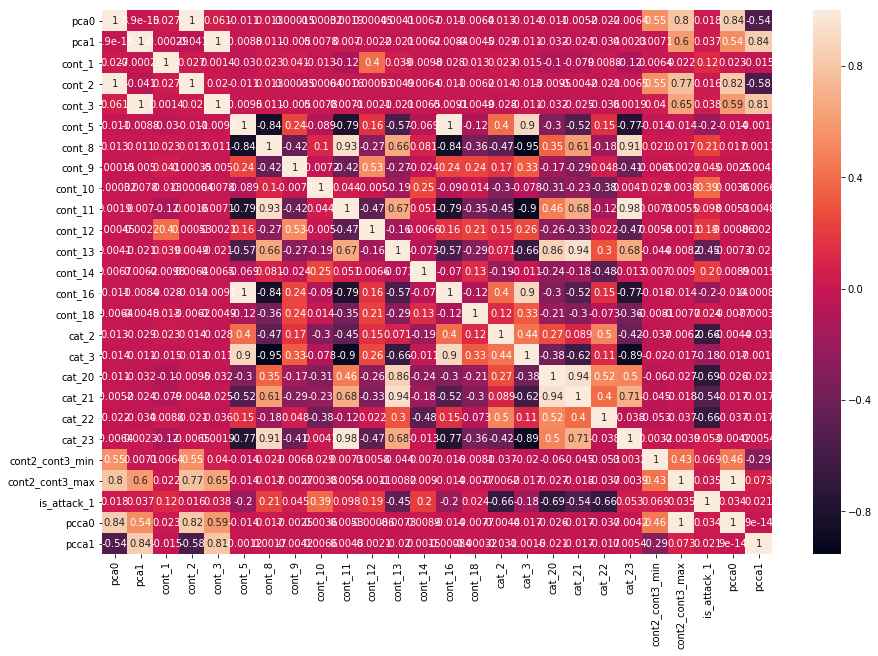

In [185]:
plot_(train)

In [202]:
train=pd.concat([fs1_tr,fs6_tr,fs7_tr],1)
test=pd.concat([fs1_ts,fs2_ts,fs3_ts,fs4_ts,fs5_ts['is_attack_1']],1)

In [203]:
drp=['cont_4','cont_6','cont_17','cont_15','cat_9','cont2_cont3_mean','cont_7','cat_1']

In [174]:
train=train.drop(drp,1)
test=test.drop(drp,1)

In [204]:
train.shape,test.shape

((169307, 6), (91166, 32))

In [205]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [206]:
X_train, X_valid, y_train, y_valid = train_test_split(train[get_features(train)], target, train_size = 0.8, stratify = target, random_state = 1996)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [207]:
## function for multi-accuracy
from sklearn.metrics import accuracy_score
def multAcc(pred, dtrain):
    label = dtrain.get_label()
    acc = accuracy_score(label, pred)
    return 'maccuracy', acc

In [208]:
# default parameters
params_ = {}
params_['objective'] = 'multi:softmax'
params_['eta'] = 0.2
params_['silent'] = True
params_['max_depth'] = 10
params_['subsample'] = 0.9
params_['colsample_bytree'] = 0.9
params_['nthread']=-1
params_['num_class']=3
params_['booster']='gbtree'
params_['lambda']=.8
params_['min_child_weight']=20
'''
{'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,
            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}
'''

"\n{'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,\n            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,\n            'eval_metric': 'rmse', 'objective': 'reg:linear'}\n"

In [211]:
# default parameters
params = {}
params['objective'] = 'multi:softmax'
params['eta'] = 0.01
params['silent'] = True
params['max_depth'] = 6
params['subsample'] = 0.9
params['colsample_bytree'] = 0.9
params['nthread']=-1
params['num_class']=3

In [212]:
# dtrain = xgb.DMatrix(data=train[get_features(train)], label=target)
dtrain = xgb.DMatrix(data=X_train[get_features(train)], label=y_train)
dvalid = xgb.DMatrix(data=X_valid[get_features(train)], label=y_valid)
dtest = xgb.DMatrix(data=test[get_features(test)])
watchlist = [(dtrain, 'train'),(dvalid, 'eval')]

In [213]:
free(),train.shape,test.shape

(8047, (169307, 6), (91166, 32))

In [214]:
# .02 325 iteration 780993 after step 1  , .02 375 iteration 781053 after step 2, .02 347 iteration 781082 after step 3
# .02 392 iteration 781082 after step 4 ,after step 5 .02 362-400iter 781082
clf1_2 = xgb.train(params, dtrain, 20000, watchlist, maximize=True, verbose_eval=50, early_stopping_rounds=101, feval=multAcc)

[0]	train-maccuracy:0.779195	eval-maccuracy:0.779074
Multiple eval metrics have been passed: 'eval-maccuracy' will be used for early stopping.

Will train until eval-maccuracy hasn't improved in 101 rounds.
[50]	train-maccuracy:0.779106	eval-maccuracy:0.778956
[100]	train-maccuracy:0.77966	eval-maccuracy:0.779517
Stopping. Best iteration:
[2]	train-maccuracy:0.779682	eval-maccuracy:0.779694



In [ ]:
# clf1_1 = xgb.train(params, dtrain, 400)

In [163]:
sub=pd.read_csv('test_data.csv')
pred = clf1_2.predict(dtest)
len(pred),len(sub['connection_id'])


(91166, 91166)

In [164]:
## make submission
sub['target'] = pred
sub['target'] = sub['target'].astype(int)
sub[['connection_id','target']].to_csv('XGB_20_NOV_78.1082_.02eta_392iter.csv', index=False)

In [165]:
import pickle
pickle.dump(clf1_1,open('XGB_20_NOV_78.1082_.02eta_392iter.sav','wb'))

NameError: name 'clf1_1' is not defined

In [ ]:
free()

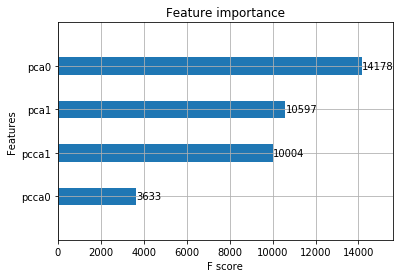

In [199]:
xgb.plot_importance(clf1_2, ax=None, height=0.4, xlim=None,
                    ylim=None, title='Feature importance',
                    xlabel='F score', ylabel='Features',
                    importance_type='weight',
                    grid=True)
plt.figure(figsize=(14,10))
plt.show()

In [167]:
pca1=PCA(n_components=2,svd_solver='full',random_state=176768)

In [168]:
pca1.fit(pd.concat([fs2_tr,fs3_tr,fs4_tr,fs5_tr],1))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=176768,
  svd_solver='full', tol=0.0, whiten=False)

In [169]:
sum(pca1.explained_variance_ratio_)

0.99967521652141278

In [171]:
fs6_tr=pca1.transform(pd.concat([fs2_tr,fs3_tr,fs4_tr,fs5_tr],1))
fs6_tr=pd.DataFrame(fs6_tr,columns=['pcca0','pcca1'])

In [201]:
fs7_tr=pca1.fit_transform(pd.concat([fs2_tr,fs3_tr,fs4_tr,fs5_tr,fs1_tr,fs6_tr],1))
fs7_tr=pd.DataFrame(fs7_tr,columns=['pccca0','pccca1'])